In [2]:
### @author     Peitsa Rautio
### @version    01.08.2024

# Summary:

# This .ipynb program imports exported Fluidit format data, builds a pandapipes
# network model and exports it as JSON to ./data/models/.

# In general, dashes in raw node names are converted to underscores due to
# Python syntax not supporting dashes in variable names.
# Dash is strictly an operator type in Python.

# Pandapipes and Pandapower © Copyright 2020-2024 by Fraunhofer Institute for
# Energy Economics and Energy System Technology (IEE), Kassel,
# and University of Kassel.

In [3]:
# Optional: check if venv is activated

import sys

def is_venv():
    return (hasattr(sys, 'real_prefix') or
            (hasattr(sys, 'base_prefix') and sys.base_prefix != sys.prefix))

if is_venv():
    print('inside virtualenv or venv')
else:
    print('outside virtualenv or venv')

outside virtualenv or venv


In [4]:
import pandas as pd
import pandapipes as pp
import numpy as np

## Simulation variables and options

# Ambient temperature [K] = t[C] + 273.15
temp_ext_c = 20
temp_ext_k = temp_ext_c + 273.15

# Initial network fluid temperature (flow side) [K] = t[C] + 273.15
t_net_flow_init_c = 85
t_net_flow_init_k = t_net_flow_init_c + 273.15

# Initial network fluid temperature (return side) [K] = t[C] + 273.15
t_net_return_init_c = 35
t_net_return_init_k = t_net_return_init_c + 273.15

# Initial junction and network pressure, flow side [bar]
net_flow_p_bar = 10
# Initial junction and network pressure, return side [bar]
net_return_p_bar = 8

In [5]:
## Import data from Data.xls into Pandas dataframes

# Define data file path
sourcefile = './data/Data.xlsx'

# Import data
df_heater = pd.read_excel(sourcefile, sheet_name=0)
df_sink = pd.read_excel(sourcefile, sheet_name=1)
df_connection = pd.read_excel(sourcefile, sheet_name=2)
df_nodetype = pd.read_excel(sourcefile, sheet_name=3)

# Prepare blank network for elements
net = pp.create_empty_network(name="Data", fluid="water")

In [6]:
## Create pandapipes junctions from imported data.
# Creates separate networks for supply and return lines. Supply and return
# lines join at sinks and heat sources.

# Get number of nodes from dataframe
num_nodes = len(df_nodetype)

# tracker tracks number of junctions created
junction_tracker = 0

# Iterate over all nodes to find and create junctions
for i in range(num_nodes):

    if df_nodetype.at[i, 'Node Type'] == "Junction":
        
        # Replace dashes with underscores to conform with Python markup
        junction_name = str(df_nodetype.at[i, 'Name']).replace("Junction-",
                                                               "Junction_")
        
        junction_pos_x = float(df_nodetype.at[i, 'X-Coordinate'])
        junction_pos_y = float(df_nodetype.at[i, 'Y-Coordinate'])
        junction_pos_flow = (junction_pos_x, junction_pos_y)
        junction_pos_return = (junction_pos_x, junction_pos_y-100)

        # Define supply and return flow network junctions
        globals()['%s_supply' % junction_name] = pp.create_junction(net,
            pn_bar=net_flow_p_bar,
            tfluid_k=t_net_flow_init_k,
            geodata=junction_pos_flow,
            name=junction_name + '_supply')
        globals()['%s_return' % junction_name] = pp.create_junction(net,
            pn_bar=net_return_p_bar,
            tfluid_k=t_net_return_init_k,
            geodata=junction_pos_return,
            name=junction_name + '_return')

        junction_tracker += 2

print("Number of junctions created:", junction_tracker)

# List junctions
net.junction

Number of junctions created: 1588


,name,pn_bar,tfluid_k,height_m,in_service,type
0,Junction_165_supply,10.0,358.15,0.0,True,junction
1,Junction_165_return,8.0,308.15,0.0,True,junction
2,Junction_300_supply,10.0,358.15,0.0,True,junction
3,Junction_300_return,8.0,308.15,0.0,True,junction
4,Junction_897_supply,10.0,358.15,0.0,True,junction
5,Junction_897_return,8.0,308.15,0.0,True,junction
6,Junction_907_supply,10.0,358.15,0.0,True,junction
7,Junction_907_return,8.0,308.15,0.0,True,junction
8,Junction_909_supply,10.0,358.15,0.0,True,junction
9,Junction_909_return,8.0,308.15,0.0,True,junction


> &#9658; Information on multiple source heating network models

JanStock1 commented on Feb 26 2024

Hello everyone,
I would like to comment on this issue as I came up with the same problem of several producers in a district heating network. The solution proposed by @cvTHM worked well for me (additional producers modelled by heat_exchanger and flow_controller). However, since the heat supply and the mass flow are prescribed in this modelling approach (interpreted as base load producer), the supply temperature at these producers is not fixed but depends on the return temperature (temperature difference is fixed). Therefore, the supply temperature at such a producer varies depending on the return temperature, i.e. on the load situation in the district heating network. Thus, the supply temperature at the producers modelled with heat_exchanger and flow_controller is quite low at some load times.

I have tested an alternative approach that ensures a constant supply temperature at the additional producers, but the actual heat supply at these producers differs slightly from the calculated value.
The first producer in the district heating network is still modelled as a circ_pump_pressure component. The circ_pump_mass component, which prescribes a certain mass flow, can be used (since pandapipes 0.9.0) to specify the temperature at the supply node of additional producers. A heat flow can be calculated using the specified mass flow and the known design temperature difference between supply and return (later more on that). The pressure at the supply node of the circ_pump_mass component must be specified, otherwise there may be no mass flow at the supply node (depending on the pressure conditions in the network). However, if a pressure value is set at the supply nodes of the additional producers (circ_pump_mass) and at the first producer (circ_pump_pressure), the resulting mass flow in the network may not be as desired, as the mass flow follows the fixed pressure conditions in the network. Therefore, a flow_controller is required downstream of the supply node of a circ_pump_mass component, which regulates the pressure conditions and ensures the desired mass flow, which is also set to the circ_pump_mass component but is not yet reached due to the first producer, i.e. the fixed pressure at the circ_pump_pressure component.

The main advantage of this proposed modelling approach (circ_pump_mass and flow_controller) is that the supply temperature at the additional producers can be set. However, as the return temperature at the producers is not known in advance, but the supply temperature and the mass flow are specified, the actually supplied heat at these producers deviates slightly from the calculated value. By varying the set mass flows at the producers depending on the supply condition and the estimated heat losses in the network, the actually supplied heat can be approximated to the aimed value.

In [7]:
## Create pandapipes source nodes

# See markdown notes above for information on multiple producer networks.

# Raw source heater values are given as kW [J/s * 10^3], pp circ_pump_mass
# uses mass flow mkg/s, use conversion ratio variable to adjust.

# Conversion ratio from raw data, denotes average ratio between base demand
# [kW] and base demand [kg/s].  Assumes ~50 K / kg of energy heat difference
# between flow and return networks (210.4648 * 10^3 J/kg / 4190 J/kg ~= 50).
e_flow_conv_ratio = (7 / 0.033 + 40.3 / 0.193) / 2 # = 210.4648

# Output water temperature [K] = t[C] + 273.15
t_out_c = 90
t_out_k = t_out_c + 273.15

# Pressure at flow side of producers [bar]
source_flow_bar = 10

# Pressure lift induced by sources [bar] - Used to model pressure difference
# at pump nodes between input and output
pressure_lift = 3

# Production multiplier - general multiplier for testing effects of increasing/
# reducing heated water production. Multiplier applies to mdot_flow_kg_per_s
prod_multiplier = 1

# Get source connections and create source nodes
for i in range(len(df_heater)):
    
    if str(df_heater.iloc[i,0]) != "Ericsson": # Ericsson special case below
        source_name = str(df_heater.iloc[i,0])

        for j in range(len(df_connection)):
            
            if str(df_connection.at[j, 'Start Node']) == source_name:
                
                source_flow = globals()[str(df_connection.at[j, 'End Node'])
                                        .replace("Junction-", "Junction_") + 
                                        '_supply']
                
                source_return = globals()[str(df_connection.at[j, 'End Node'])
                                          .replace("Junction-", "Junction_") +
                                          '_return']
                
                pp.create_circ_pump_const_pressure(
                    net,
                    flow_junction=source_flow,
                    return_junction=source_return,
                    plift_bar=pressure_lift,
                    p_flow_bar=source_flow_bar,
                    mdot_flow_kg_per_s=pd.to_numeric(df_heater.iloc[i,2])/e_flow_conv_ratio,                
                    t_flow_k=t_out_k,
                    name=source_name)
        
            elif str(df_connection.at[j, 'End Node']) == source_name:

                source_flow = globals()[str(df_connection.at[j, 'Start Node'])
                                        .replace("Junction-", "Junction_") + 
                                        '_supply']
                
                source_return = globals()[str(df_connection.at[j, 'Start Node'])
                                          .replace("Junction-", "Junction_") +
                                          '_return']
                
                pp.create_circ_pump_const_pressure(
                    net,
                    flow_junction=source_flow,
                    return_junction=source_return,
                    plift_bar=pressure_lift,
                    p_flow_bar=source_flow_bar,
                    mdot_flow_kg_per_s=pd.to_numeric(df_heater.iloc[i,2])*e_flow_conv_ratio,
                                                    
                    t_flow_k=t_out_k,
                    name=source_name)

# Ericsson special case: Ericsson has only return connections;
# Ericsson set as a slack node in the network.

# Create auxiliary junction to connect to Ericsson

globals()['Ericsson_connection'] = pp.create_junction(
                                    net, pn_bar=net_return_p_bar,
                                    tfluid_k=t_net_return_init_k,
                                    name='Ericsson_connection')

# Tracker for Ericsson auxiliary junction connections
e_pipe_tracker = 0

for i in range(len(df_connection)):

    if str(df_connection.at[i, 'Start Node']) == 'Ericsson':
                
        connection_name = globals()[str(df_connection.at[i, 'End Node'])
                                        .replace("Junction-", "Junction_") + 
                                        '_return']

        pp.create_pipe_from_parameters(net,
            from_junction=connection_name,
            to_junction=Ericsson_connection,
            length_km=float(str(df_connection.at[i, 'Length [m]']))/1000,
            diameter_m=float(str(df_connection.at[i, 'Diameter [mm]']))/1000,
            u_w_per_m2k=float(str(df_connection.at[i, 'Heat Transfer Coefficient [W/mK]'])), # W/mK from raw data
            text_k=int(temp_ext_k),
            name='Pipe_E_' + str(e_pipe_tracker)
            )
        
        e_pipe_tracker += 1
        
    elif str(df_connection.at[i, 'End Node']) == 'Ericsson':

        connection_name = globals()[str(df_connection.at[i, 'Start Node'])
                                        .replace("Junction-", "Junction_") + 
                                        '_return']

        pp.create_pipe_from_parameters(net,
            from_junction=connection_name,
            to_junction=Ericsson_connection,
            length_km=float(str(df_connection.at[i, 'Length [m]']))/1000,
            diameter_m=float(str(df_connection.at[i, 'Diameter [mm]']))/1000,
            k_mm=.05,
            u_w_per_m2k=float(str(df_connection.at[i, 'Heat Transfer Coefficient [W/mK]'])), # W/mK from raw data
            text_k=int(temp_ext_k),
            name='Pipe_E_' + str(i)
            )
        
        e_pipe_tracker += 1

# Create Ericsson slack node

Ericsson = pp.create_ext_grid(net,
                              junction=Ericsson_connection,
                              p_bar=net_return_p_bar,
                              t_k=t_net_return_init_k,
                              name="Ericsson Ext. Grid")


# List sources
net.circ_pump_pressure
#help(pp.create_pipe_from_parameters)

,name,return_junction,flow_junction,p_flow_bar,t_flow_k,plift_bar,in_service,type,mdot_flow_kg_per_s
0,Sarfvik,171,170,10.0,363.15,3.0,True,pt,1.900556e+02
1,Kirkkonummi,75,74,10.0,363.15,3.0,True,pt,4.209295e+06


In [8]:
## Create pandapipes sink nodes

# Desired return water temperature [K] = t[C] + 273.15
# Use t_return_c = t_net_return_init_c to set to initial network temp
t_return_c = t_net_return_init_c + 5
t_return_k = t_return_c + 273.15

# Get number of sinks and connections
num_sinks = len(df_sink)
num_connections = len(df_connection)

# Tracker tracks number of sinks created
sink_tracker = 0

# Iterate over number of raw data rows to find and create sinks
for i in range(num_sinks):

    sink_get = str(df_sink.at[i, 'Name'])

    # Get sink details
    for j in range(num_sinks):
        if df_sink.at[j, 'Name'] == sink_get:
            sink_type = str(df_sink.at[j, 'Category'])
            sink_priority = int(str(df_sink.at[j, 'Priority']))
            sink_demand_kW = float(str(df_sink.at[j, 'Demand 02-03']))*4.19*50
            mdot_kg_per_s_demand = float(str(df_sink.at[j, 'Demand 02-03']))
            sink_x = float(str(df_sink.at[j, 'X-Coordinate']))
            sink_y = float(str(df_sink.at[j, 'Y-Coordinate']))

    # Get connecting junction and pipe diameter
    for k in range(num_connections):
        if df_connection.at[k, "End Node"] == sink_get:
            sink_source = globals()[str(df_connection.at[k, 'Start Node']).
                                    replace("Junction-", "Junction_") + '_supply']
            sink_return = globals()[str(df_connection.at[k, 'Start Node']).
                                    replace("Junction-", "Junction_") + '_return']
            connection_d_mm = float(str(df_connection.at[k, 'Diameter [mm]']))
            mdot_kg_per_s_capacity = float(str(df_connection.at[k, 'Capacity [kg/s]']))

    sink_name = sink_get.replace("Junction-", "Sink_")

    # Define sink
    pp.create_heat_consumer(net,
                            from_junction=sink_source,
                            to_junction=sink_return,
                            diameter_m=connection_d_mm/1000,
                            qext_w=sink_demand_kW*1000,
                            # controlled_mdot_kg_per_s=mdot_kg_per_s_capacity,
                            #controlled_mdot_kg_per_s=mdot_kg_per_s_demand,
                            # deltat_k=50,
                            treturn_k=t_return_k,
                            name=sink_name, type=sink_type,
                            x = sink_x, y = sink_y)
        
    sink_tracker += 1

#help(pp.create_heat_consumer)
print("Number of sinks created:", sink_tracker)
net.heat_consumer

Number of sinks created: 496


,name,from_junction,to_junction,qext_w,controlled_mdot_kg_per_s,deltat_k,treturn_k,diameter_m,in_service,type,x,y
0,Sink_129107,1556,1557,0.000000e+00,NaN,NaN,313.15,0.0431,True,Omakotitalot,364515.273438,6.671667e+06
1,Sink_127293,1470,1471,1.158703e+07,NaN,NaN,313.15,0.0431,True,Rivitalot,366388.238281,6.670421e+06
2,Sink_127222,1458,1459,1.250872e+07,NaN,NaN,313.15,0.0545,True,Asuinkerrostalot,363241.328125,6.672005e+06
3,Sink_128285,1464,1465,8.953611e+06,NaN,NaN,313.15,0.0703,True,Asuinkerrostalot,362779.742188,6.670984e+06
4,Sink_128595,1546,1547,1.185037e+07,NaN,NaN,313.15,0.0545,True,Asuinkerrostalot,358357.375000,6.668174e+06
5,Sink_128600,1544,1545,1.088478e+07,NaN,NaN,313.15,0.0545,True,Asuinkerrostalot,358353.585938,6.668128e+06
6,Sink_128440,1542,1543,3.160098e+06,NaN,NaN,313.15,0.0431,True,Ravintolarakennukset ja vastaa,363662.378906,6.671073e+06
7,Sink_129109,1558,1559,1.106034e+07,NaN,NaN,313.15,0.0431,True,Omakotitalot,364517.945313,6.671668e+06
8,Sink_129149,1566,1567,1.571271e+07,NaN,NaN,313.15,0.0431,True,Asuinkerrostalot,362785.101563,6.671080e+06
9,Sink_129272,1580,1581,9.041392e+06,NaN,NaN,313.15,0.0545,True,Asuinkerrostalot,363316.925781,6.671833e+06


In [9]:
## Create pipe connections

# Defines pipe connections between junctions. Source and sink connections
# are defined at heat pump node and heat exchanger creation.

# Tracker tracks number of pipes created
pipe_tracker = 0

# Concatenate source and sink names to single NumPy array
np_heaters_sinks = pd.concat([df_heater[['Name']], df_sink[['Name']]]).to_numpy()
num_heaters_sinks = len(np_heaters_sinks)

for i in range(num_connections):
    
    pipe_get = str(df_connection.at[i, 'Name']).replace("-", "_")

    start_node = str(df_connection.at[i, 'Start Node'])
    end_node = str(df_connection.at[i, 'End Node'])

    if str(df_connection.at[i, 'Has Supply Line']) == 'True': supply_line = True
    else: supply_line = False
    if str(df_connection.at[i, 'Has Return Line']) == 'True': return_line = True
    else: return_line = False
 
    # Exclude source and sink node connections (defined earlier)
    if start_node not in np_heaters_sinks and end_node not in np_heaters_sinks:
            
        # Create supply line pipe
        if supply_line == True:
            
            pipe_from = globals()[str(df_connection.at[i, 'Start Node']).
                                  replace("Junction-", "Junction_") + '_supply']
            pipe_to = globals()[str(df_connection.at[i, 'End Node']).
                                replace("Junction-", "Junction_") + '_supply']
            pipe_name = pipe_get + '_supply'

            pp.create_pipe_from_parameters(net,
                from_junction=pipe_from,
                to_junction=pipe_to,
                length_km=float(str(df_connection.at[i, 'Length [m]']))/1000,
                diameter_m=float(str(df_connection.at[i, 'Diameter [mm]']))/1000,
                k_mm=.05,
                u_w_per_m2k=float(str(df_connection.at[i, 'Heat Transfer Coefficient [W/mK]'])), # W/mK from raw data
                sections=5,
                text_k=int(temp_ext_k),
                name=pipe_name
                )
            pipe_tracker += 1
        
        # Create return line pipe
        if return_line == True:

            pipe_from = globals()[str(df_connection.at[i, 'End Node']).
                replace("Junction-", "Junction_") + '_return']
            pipe_to = globals()[str(df_connection.at[i, 'Start Node']).
                replace("Junction-", "Junction_") + '_return']
            pipe_name = pipe_get + '_return'

            pp.create_pipe_from_parameters(net,
                from_junction=pipe_from,
                to_junction=pipe_to,
                length_km=float(str(df_connection.at[i, 'Length [m]']))/1000,
                diameter_m=float(str(df_connection.at[i, 'Diameter [mm]']))/1000,
                u_w_per_m2k=float(str(df_connection.at[i, 'Heat Transfer Coefficient [W/mK]'])), # W/mK from raw data
                text_k=int(temp_ext_k),
                name=pipe_name,
                sections=5,
                k_mm=.05
                )
            pipe_tracker += 1

print("Number of pipes created: ", pipe_tracker)
net.pipe

Number of pipes created:  1616


,name,from_junction,to_junction,std_type,length_km,diameter_m,k_mm,loss_coefficient,u_w_per_m2k,text_k,qext_w,sections,in_service,type
0,Pipe_E_97,201,1588,None,0.12795,0.2101,0.05,0.0,100.0,293.0,0.0,1,True,pipe
1,Pipe_E_1064,1345,1588,None,0.00484,0.1603,0.05,0.0,100.0,293.0,0.0,1,True,pipe
2,Pipe_862_supply,10,8,None,0.01001,0.1325,0.05,0.0,100.0,293.0,0.0,5,True,pipe
3,Pipe_862_return,9,11,None,0.01001,0.1325,0.05,0.0,100.0,293.0,0.0,5,True,pipe
4,Pipe_865_supply,14,16,None,0.00039,0.2101,0.05,0.0,100.0,293.0,0.0,5,True,pipe
5,Pipe_865_return,17,15,None,0.00039,0.2101,0.05,0.0,100.0,293.0,0.0,5,True,pipe
6,Pipe_867_supply,10,14,None,0.09491,0.2101,0.05,0.0,100.0,293.0,0.0,5,True,pipe
7,Pipe_867_return,15,11,None,0.09491,0.2101,0.05,0.0,100.0,293.0,0.0,5,True,pipe
8,Pipe_938_supply,22,20,None,0.00400,0.0545,0.05,0.0,100.0,293.0,0.0,5,True,pipe
9,Pipe_938_return,21,23,None,0.00400,0.0545,0.05,0.0,100.0,293.0,0.0,5,True,pipe


In [10]:
net.pipe.name

0                Pipe_E_97
1              Pipe_E_1064
2          Pipe_862_supply
3          Pipe_862_return
4          Pipe_865_supply
5          Pipe_865_return
6          Pipe_867_supply
7          Pipe_867_return
8          Pipe_938_supply
9          Pipe_938_return
10         Pipe_973_supply
11         Pipe_973_return
12         Pipe_975_supply
13         Pipe_975_return
14        Pipe_1324_supply
15        Pipe_1324_return
16        Pipe_1382_supply
17        Pipe_1382_return
18        Pipe_1385_supply
19        Pipe_1385_return
20        Pipe_1394_supply
21        Pipe_1394_return
22        Pipe_1398_supply
23        Pipe_1398_return
24        Pipe_1435_supply
25        Pipe_1435_return
26        Pipe_1437_supply
27        Pipe_1437_return
28        Pipe_1441_supply
29        Pipe_1441_return
30        Pipe_1867_supply
31        Pipe_1867_return
32        Pipe_1875_supply
33        Pipe_1875_return
34        Pipe_1876_supply
35        Pipe_1876_return
36        Pipe_1880_supply
3

The following junctions cannot be displayed, as there is no geodata available: {1588}
No coords found for pipes {0, 1}. Junction geodata is missing for those pipes!


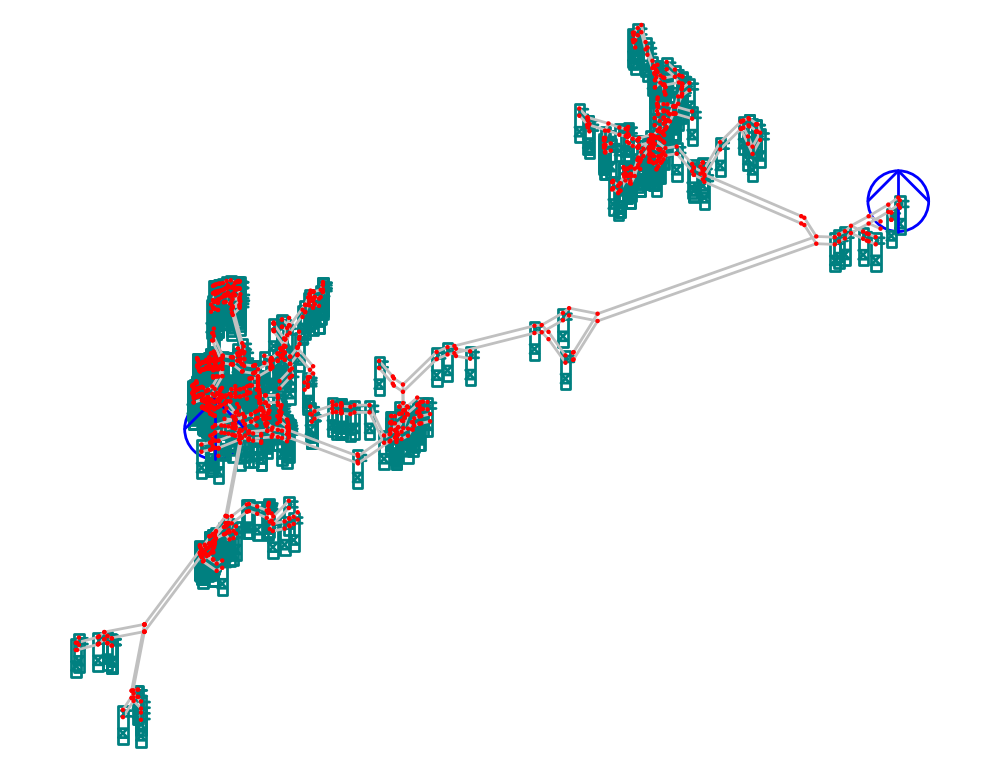

<Axes: >

In [11]:
## Code for inspecting elements and debugging

# net.junction.loc(Junction_1000_return)

# Plotting

import pandapipes.plotting as plot

plot.simple_plot(net, plot_sinks=True, plot_sources=True,
                 junction_size=0.2, heat_consumer_size=0.5,
                 heat_consumer_color='Teal', pump_size=0.5,
                 pump_color='Blue')

In [14]:
## Run pipeflow
pp.pipeflow(net, mode='hydraulics') # Modes = sequential, bidirectional

c:\Users\Victus\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandapipes\component_models\junction_component.py:114: UserWarning: Pipeflow converged, however, the results are physically incorrect as pressure is negative at nodes [   0.    2.    4.    6.    8.   10.   12.   14.   16.   18.   20.   22.
   24.   26.   28.   30.   32.   34.   36.   38.   40.   42.   44.   46.
   48.   50.   52.   54.   56.   58.   60.   62.   64.   66.   68.   70.
   72.   76.   78.   80.   82.   84.   86.   88.   90.   92.   94.   96.
   98.  100.  102.  104.  106.  108.  110.  112.  114.  116.  118.  120.
  122.  124.  126.  128.  130.  132.  134.  136.  138.  140.  142.  144.
  146.  148.  150.  152.  154.  156.  158.  160.  162.  164.  166.  168.
  172.  174.  176.  178.  180.  182.  184.  186.  188.  190.  192.  194.
  196.  198.  200.  202.  204.  206.  208.  210.  212.  214.  216.  218.
  220.  222.  224.  226.  228.  230.  232.  234.  236.  238.  240.  242.
  244.  246.  248.  250.  252

In [17]:
net.res_pipe # Modes = res_heat_consumer, res_junction, res_pipe, res_circ_pump_pressure

,v_mean_m_per_s,p_from_bar,p_to_bar,t_from_k,t_to_k,mdot_from_kg_per_s,mdot_to_kg_per_s,vdot_norm_m3_per_s,reynolds,lambda
0,114.039087,571.149546,8.000000,308.15,308.15,3.953153e+03,-3.953153e+03,3.953627,3.336640e+07,0.014223
1,295.024312,205.781793,8.000000,308.15,308.15,5.953367e+03,-5.953367e+03,5.954081,6.585987e+07,0.015054
2,127.243282,-22601.400461,-22697.310691,358.15,358.15,1.754302e+03,-1.754302e+03,1.754513,5.070599e+07,0.015684
3,127.243282,18188.732769,18092.813589,308.15,308.15,1.754302e+03,-1.754302e+03,1.754513,2.347904e+07,0.015686
4,117.667378,-23046.101172,-23047.928517,358.15,358.15,4.078928e+03,-4.078928e+03,4.079417,7.435166e+07,0.014222
5,117.667378,18539.372985,18537.545512,308.15,308.15,4.078928e+03,-4.078928e+03,4.079417,3.442799e+07,0.014223
6,117.667378,-22601.400461,-23046.101172,358.15,358.15,4.078928e+03,-4.078928e+03,4.079417,7.435166e+07,0.014222
7,117.667378,18537.545512,18092.813589,308.15,308.15,4.078928e+03,-4.078928e+03,4.079417,3.442799e+07,0.014223
8,14.582483,-33219.805329,-33221.306896,358.15,358.15,3.401436e+01,-3.401436e+01,0.034018,2.390213e+06,0.019244
9,14.582483,28098.767199,28097.263209,308.15,308.15,3.401436e+01,-3.401436e+01,0.034018,1.106770e+06,0.019275


In [ ]:
## Export model to JSON

pp.to_json(net, "output/models/RHN-Full.json")